<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Preprocessing/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Format the csv file into correct format**

In [ ]:
import pandas as pd
from google.colab import files

file_path = 'RawDataset.csv'
data = pd.read_csv(file_path, delimiter=';')

output_path = 'CleanedDataset.csv'
data.to_csv(output_path, index=False)

print(data.head())
files.download(output_path)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Check null values**

In [ ]:
import pandas as pd

data = pd.read_csv('CleanedDataset.csv')

# Check for null values
nullValues = data.isnull().sum()
# Display columns with null values
print("Null values in each column:")
print(nullValues)

Null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# **Handle duplicates**

## Check for duplicate values

In [3]:
import pandas as pd

# Load the dataset
file_path = "CleanedDataset.csv"
data = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Duplicate rows found:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      

## Remove duplicate rows

In [5]:
# Remove duplicate rows
data = data.drop_duplicates()
print("Duplicate rows removed.")

# Save the updated dataset to a new file
output_file_path = "CleanedDataset.csv"
data.to_csv(output_file_path, index=False)
print(f"Updated dataset saved to {output_file_path}.")

Duplicate rows removed.
Updated dataset saved to CleanedDataset.csv.


# **Feature importance**

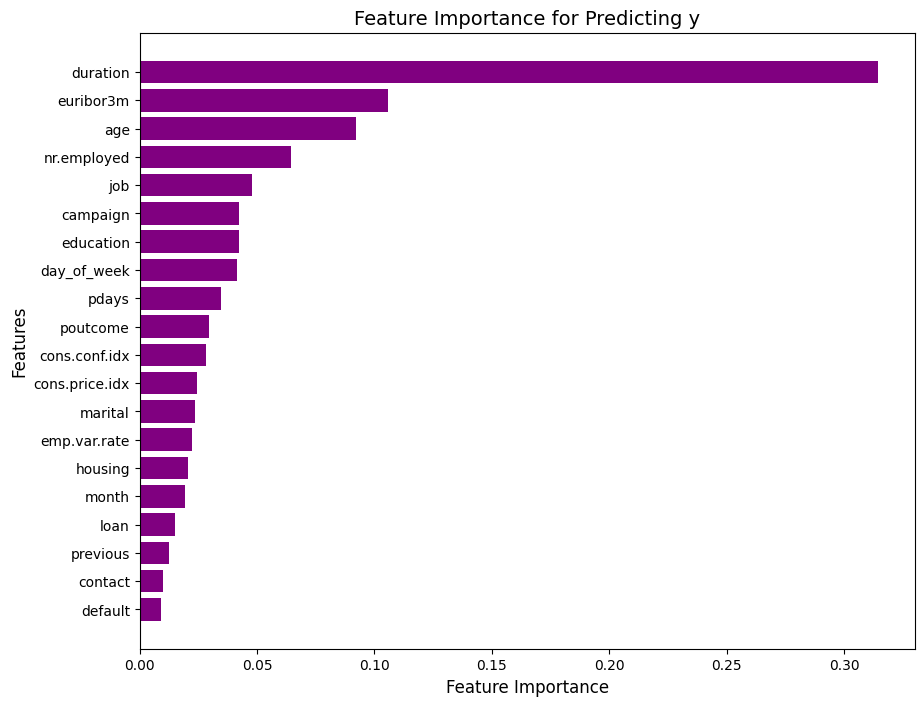

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = 'CleanedDataset.csv'
data = pd.read_csv(file_path)

# Do a simple encoding to train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort features
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Drop unnecessary columns**

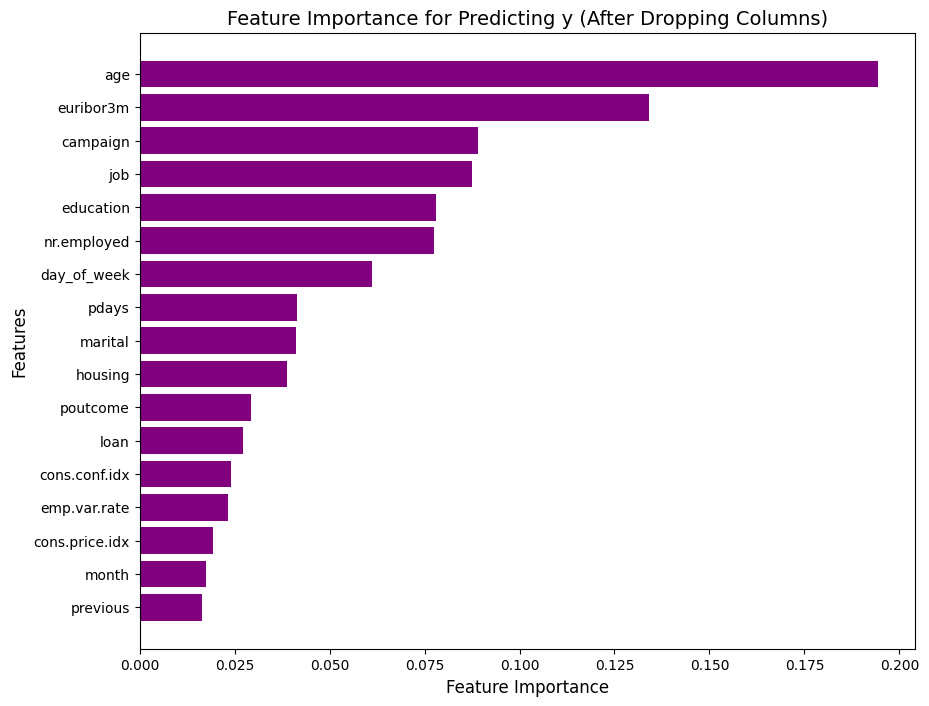

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = 'CleanedDataset.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['duration', 'contact', 'default'])

# Save the updated dataset to a new CSV file
data.to_csv('DatasetDropped.csv', index=False)

# Do a simple encoding for train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model for get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort by importance
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y (After Dropping Columns)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Check correlations between x variables**

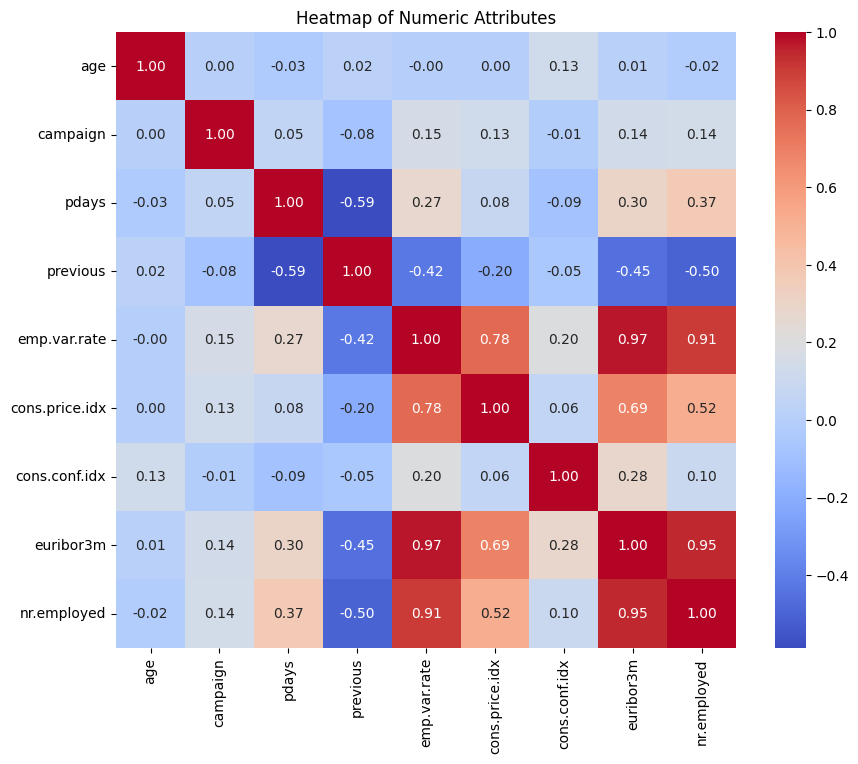

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'DatasetDropped.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

# **Check Outliers**

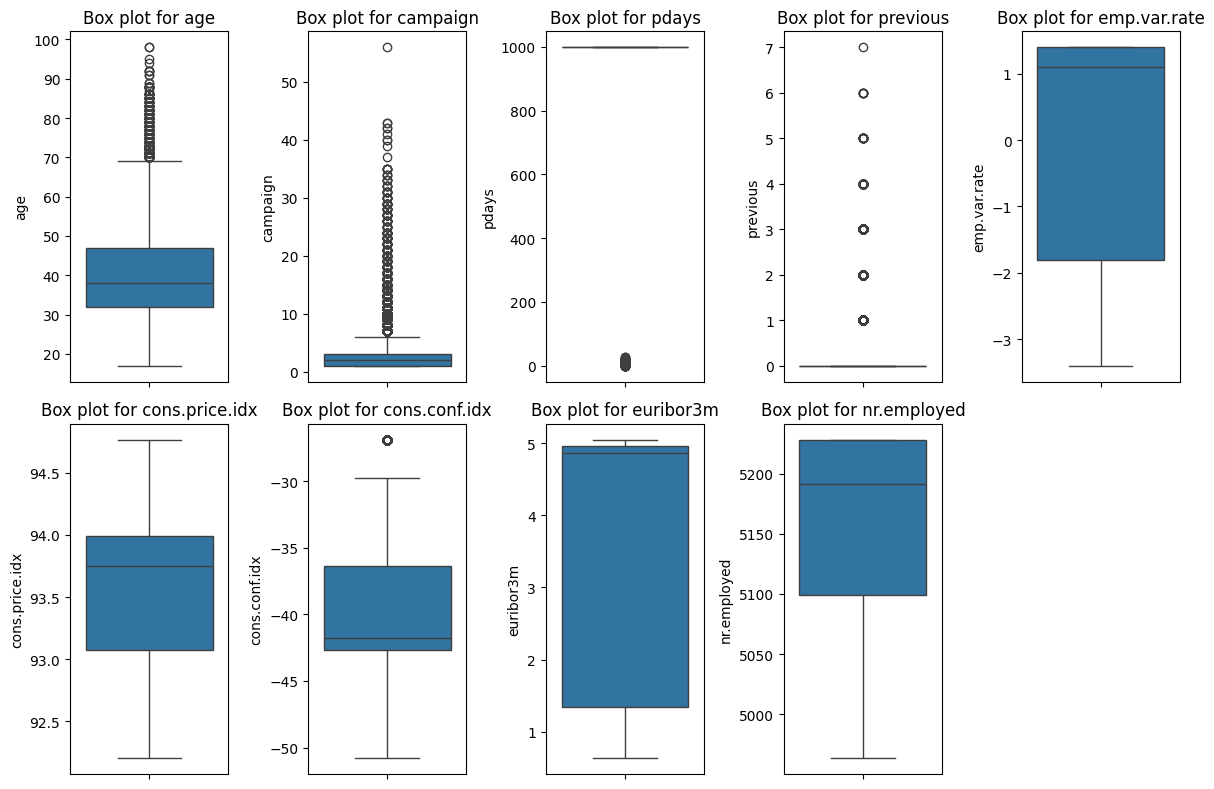

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, (len(numerical_columns) + 1) // 2, i)  # Arrange plots in a grid
    sns.boxplot(data=data[column])
    plt.title(f"Box plot for {column}")
    plt.tight_layout()

# Show the plot
plt.show()

# **Encodeing**

In [ ]:
import pandas as pd

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Replace True and False with 1 and 0 only for boolean columns
encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']] = encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']].astype(int)

# Replace 999 with 1 and other values with 0 in the 'pdays' column, and rename the column
encoded_data['prev_cont'] = encoded_data['pdays'].replace(999, 1).apply(lambda x: 0 if x != 1 else x)

# Drop the original 'pdays' column
encoded_data = encoded_data.drop(columns=['pdays'])

# Rename the 'y_yes' column to 'y'
encoded_data = encoded_data.rename(columns={'y_yes': 'y'})

# Move the 'y' column to the end
cols = [col for col in encoded_data if col != 'y'] + ['y']
encoded_data = encoded_data[cols]

# Display the transformed dataset
encoded_data.head()

# Save the encoded data to CSV
encoded_data.to_csv('Encoded.csv', index=False)